In [1]:
%matplotlib inline
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import imageio
from numpy.random import randint, shuffle, choice

# Gradient descent

We have observed that simple simulations can solve complex problems. We will see now how we can apply this paradigm for optimization problems.

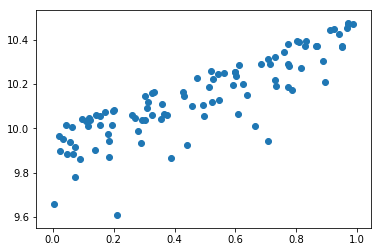

In [2]:
np.random.seed(42)
x = np.random.rand(100)
x.sort()
y = x / 2 + np.log(np.random.rand(100))/10 + 10
plt.scatter(x,y)
plt.show()

In [3]:
k, b = 0, 0     # initial values
epochs = 1000
learning_rate = 0.1

L = []   # storage for k and b through training
for i in range(epochs):
    pred = k * x + b
    L.append([k, b])
    pred_diff_k = x
    pred_diff_b = 1
    k += 2 * learning_rate * np.mean(pred_diff_k * (y - pred))
    b += 2 * learning_rate * np.mean(pred_diff_b * (y - pred))

print('Obtained parameters: k = {0:.04f}, b = {1:.04f}'.format(k, b))

Obtained parameters: k = 0.5271, b = 9.8882


In [4]:
print('Exact solution: k = {0:.04f}, b = {1:.04f}'.format(*np.polyfit(x, y, 1)))

Exact solution: k = 0.5271, b = 9.8882


In [5]:
# images = []
# for i in range(epochs)[::10]:
#     f_line = np.poly1d(L[i])
#     plt.scatter(x, y, color = 'grey')
#     plt.title('k = {0:.04f}, b = {1:.04f}'.format(*L[i]))
#     plt.plot(x, f_line(x), color = 'red')
#     plt.ylim(9.25, 10.75)
#     plt.savefig('img/grad_desc/{0}.jpg'.format(i))
#     images.append(imageio.imread('img/grad_desc/{0}.jpg'.format(i)))
#     plt.close()

# imageio.mimsave('img/grad_desc_demo.gif', images, duration=0.1)

![Gradient descent demo](img/grad_desc_demo.gif)

This principle will be used throughout the course and is main ingredients of neural net models!

## Task 1. Use GD to fit 2nd degree polynomial

Fiven following data implement GD from scratch to fit 2nd degree polynomial to the following dataset:

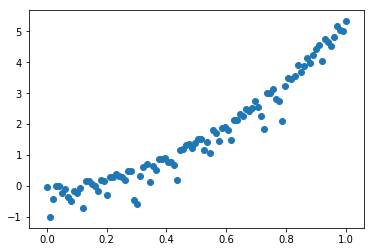

In [97]:
x = np.linspace(0, 1, 100)
y = x / 2 + 5 * x**2 + np.log(np.random.rand(100))/3
plt.scatter(x, y)

a = 4.9611, b = 0.5297, c = -0.2777


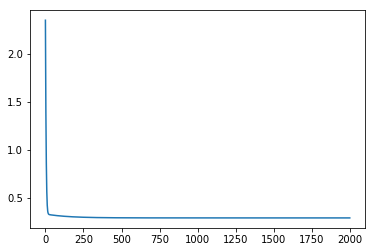

In [128]:
a, b, c = 0, 0, 0     # initial values
epochs = 2000
learning_rate = 1.3

rmse = []   # list to store RMSE while training
for _ in range(epochs):
    pred = a * x**2 + b * x + c
    rmse.append(np.sqrt(np.mean((pred - y)**2)))
    a -= learning_rate * np.mean((pred - y) * x**2)
    b -= learning_rate * np.mean((pred - y) * x)
    c -= learning_rate * np.mean((pred - y))
    
print(f'a = {a:.04f}, b = {b:.04f}, c = {c:.04f}')
plt.plot(rmse)
plt.show()

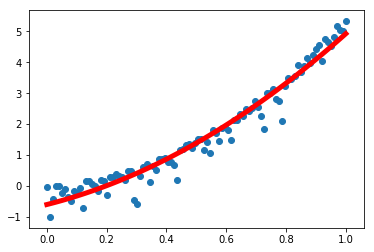

In [100]:
plt.scatter(x, y)
pred = a * x**2 + b * x + c
plt.plot(x, pred, c='red', linewidth=5)

As you can see you have to play quite a lot with parameters to achieve acutal value $a=5,b=0.5,c=0$ with small number of iterations.

## Task 2. GD for Boston dataset

Use gradient descent to fit linear regression to Boston dataset.

![Gradient descent idea](https://media.geeksforgeeks.org/wp-content/uploads/Cost-Function.jpg)

*Hint:* use np.array to represent regression weights. This trick will be useful `np.hstack([X, np.ones((len(X), 1))])`.

In [129]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

X = np.hstack([X, np.ones((len(X), 1))])

In [130]:
epochs = 10000
learning_rate = 0.0000001

# Initial weights
m = 14
beta = np.zeros(m)

# Run epochs
for _ in range(epochs):
    pred = X.dot(beta)
    # For each epoch update weights beta
    beta -= learning_rate * X.T.dot(pred - y) / m

### Mini task. Apply standard scaler before GD

In [133]:
X = boston.data
y = boston.target

# Standard scaler
X = (X - np.mean(X)) / np.std(X)

X = np.hstack([X, np.ones((len(X), 1))])

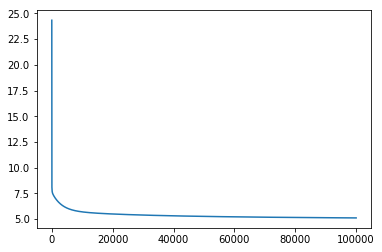

In [153]:
epochs = 100000
learning_rate = 0.004

# Initial weights
m = 14
beta = np.zeros(m)

# Run epochs
rmse = []
for _ in range(epochs):
    pred = X.dot(beta)
    rmse.append(np.sqrt(np.mean((y - pred)**2)))
    # For each epoch update weights beta
    beta -= learning_rate * X.T.dot(pred - y) / m

plt.plot(rmse)

In [154]:
beta

array([ -14.28251099,    7.64351917,   -4.32999845,   33.22874098,
         10.58261404,  124.94866143,    3.19624959, -122.08942859,
         54.01257392,   -2.61407219, -132.38115083,    1.22007899,
       -113.39526326,  -28.11447482])

### How to use GD from sklearn

In [29]:
from sklearn.linear_model import SGDRegressor, LinearRegression

In [22]:
lr = SGDRegressor()

In [23]:
lr.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)